In [1]:
import sys
import pandas as pd
import numpy as np
from itertools import combinations

# Generate all possible combinations.

In [2]:
atoms_pool = [12, 13, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 38, 56]
c = []
for i in range(5, 11):
    c += list(combinations(atoms_pool, i))
df = pd.DataFrame({'atom_list': c})
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
df['Stabilized'] = -1
X = df[atom_dict.values()]
df

,atom_list,Mg,Al,Ca,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Sr,Ba,Stabilized
0,"(12, 13, 20, 22, 23)",0.2,0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,"(12, 13, 20, 22, 24)",0.2,0.2,0.2,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,"(12, 13, 20, 22, 25)",0.2,0.2,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,"(12, 13, 20, 22, 26)",0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,"(12, 13, 20, 22, 27)",0.2,0.2,0.2,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14438,"(22, 23, 24, 25, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,-1
14439,"(22, 23, 24, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1
14440,"(22, 23, 25, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1
14441,"(22, 24, 25, 26, 27, 28, 29, 30, 38, 56)",0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,-1


# Kennard-Stone algorithm

In [3]:
def kennardstonealgorithm(x_variables, k):
    x_variables = np.array(x_variables)
    original_x = x_variables
    distance_to_average = ((x_variables - np.tile(x_variables.mean(axis=0), (x_variables.shape[0], 1))) ** 2).sum(axis=1)
    max_distance_sample_number = np.where(distance_to_average == np.max(distance_to_average))
    max_distance_sample_number = max_distance_sample_number[0][0]
    selected_sample_numbers = list()
    selected_sample_numbers.append(max_distance_sample_number)
    remaining_sample_numbers = np.arange(0, x_variables.shape[0], 1)
    x_variables = np.delete(x_variables, selected_sample_numbers, 0)
    remaining_sample_numbers = np.delete(remaining_sample_numbers, selected_sample_numbers, 0)
    for iteration in range(1, k):
        sys.stdout.write('\r %i / %i' % (iteration, k))
        selected_samples = original_x[selected_sample_numbers, :]
        min_distance_to_selected_samples = list()
        for min_distance_calculation_number in range(0, x_variables.shape[0]):
            distance_to_selected_samples = ((selected_samples - np.tile(x_variables[min_distance_calculation_number, :],
                                                                        (selected_samples.shape[0], 1))) ** 2).sum(axis=1)
            min_distance_to_selected_samples.append(np.min(distance_to_selected_samples))
        max_distance_sample_number = np.where(
            min_distance_to_selected_samples == np.max(min_distance_to_selected_samples))
        max_distance_sample_number = max_distance_sample_number[0][0]
        selected_sample_numbers.append(remaining_sample_numbers[max_distance_sample_number])
        x_variables = np.delete(x_variables, max_distance_sample_number, 0)
        remaining_sample_numbers = np.delete(remaining_sample_numbers, max_distance_sample_number, 0)
 
    return selected_sample_numbers, remaining_sample_numbers

In [4]:
# n samples are selected using kennard stone algorithm
import os
if os.path.exists('KS.csv'):
    df = pd.read_csv('KS.csv')
    df['atom_list'] = df['atom_list'].apply(lambda x: tuple(map(int, x.split(','))))
    for an, name in atom_dict.items():
        df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
    X = df[atom_dict.values()]
    train_idx = df[df.remark=='KS'].index.tolist()
    test_idx = df[df.remark!='KS'].index.tolist()
else:
    n = 500
    train_idx, test_idx = kennardstonealgorithm(X, n)

# PCA

Text(0, 0.5, 'PC 2')

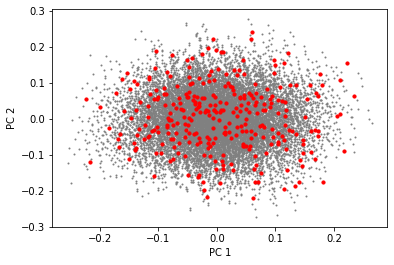

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2).fit(X)
X_ = pca.transform(X)
plt.scatter(X_[test_idx][:, 0], X_[test_idx][:, 1], color='grey', s=1)
plt.scatter(X_[train_idx][:, 0], X_[train_idx][:, 1], s=10, color='red')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

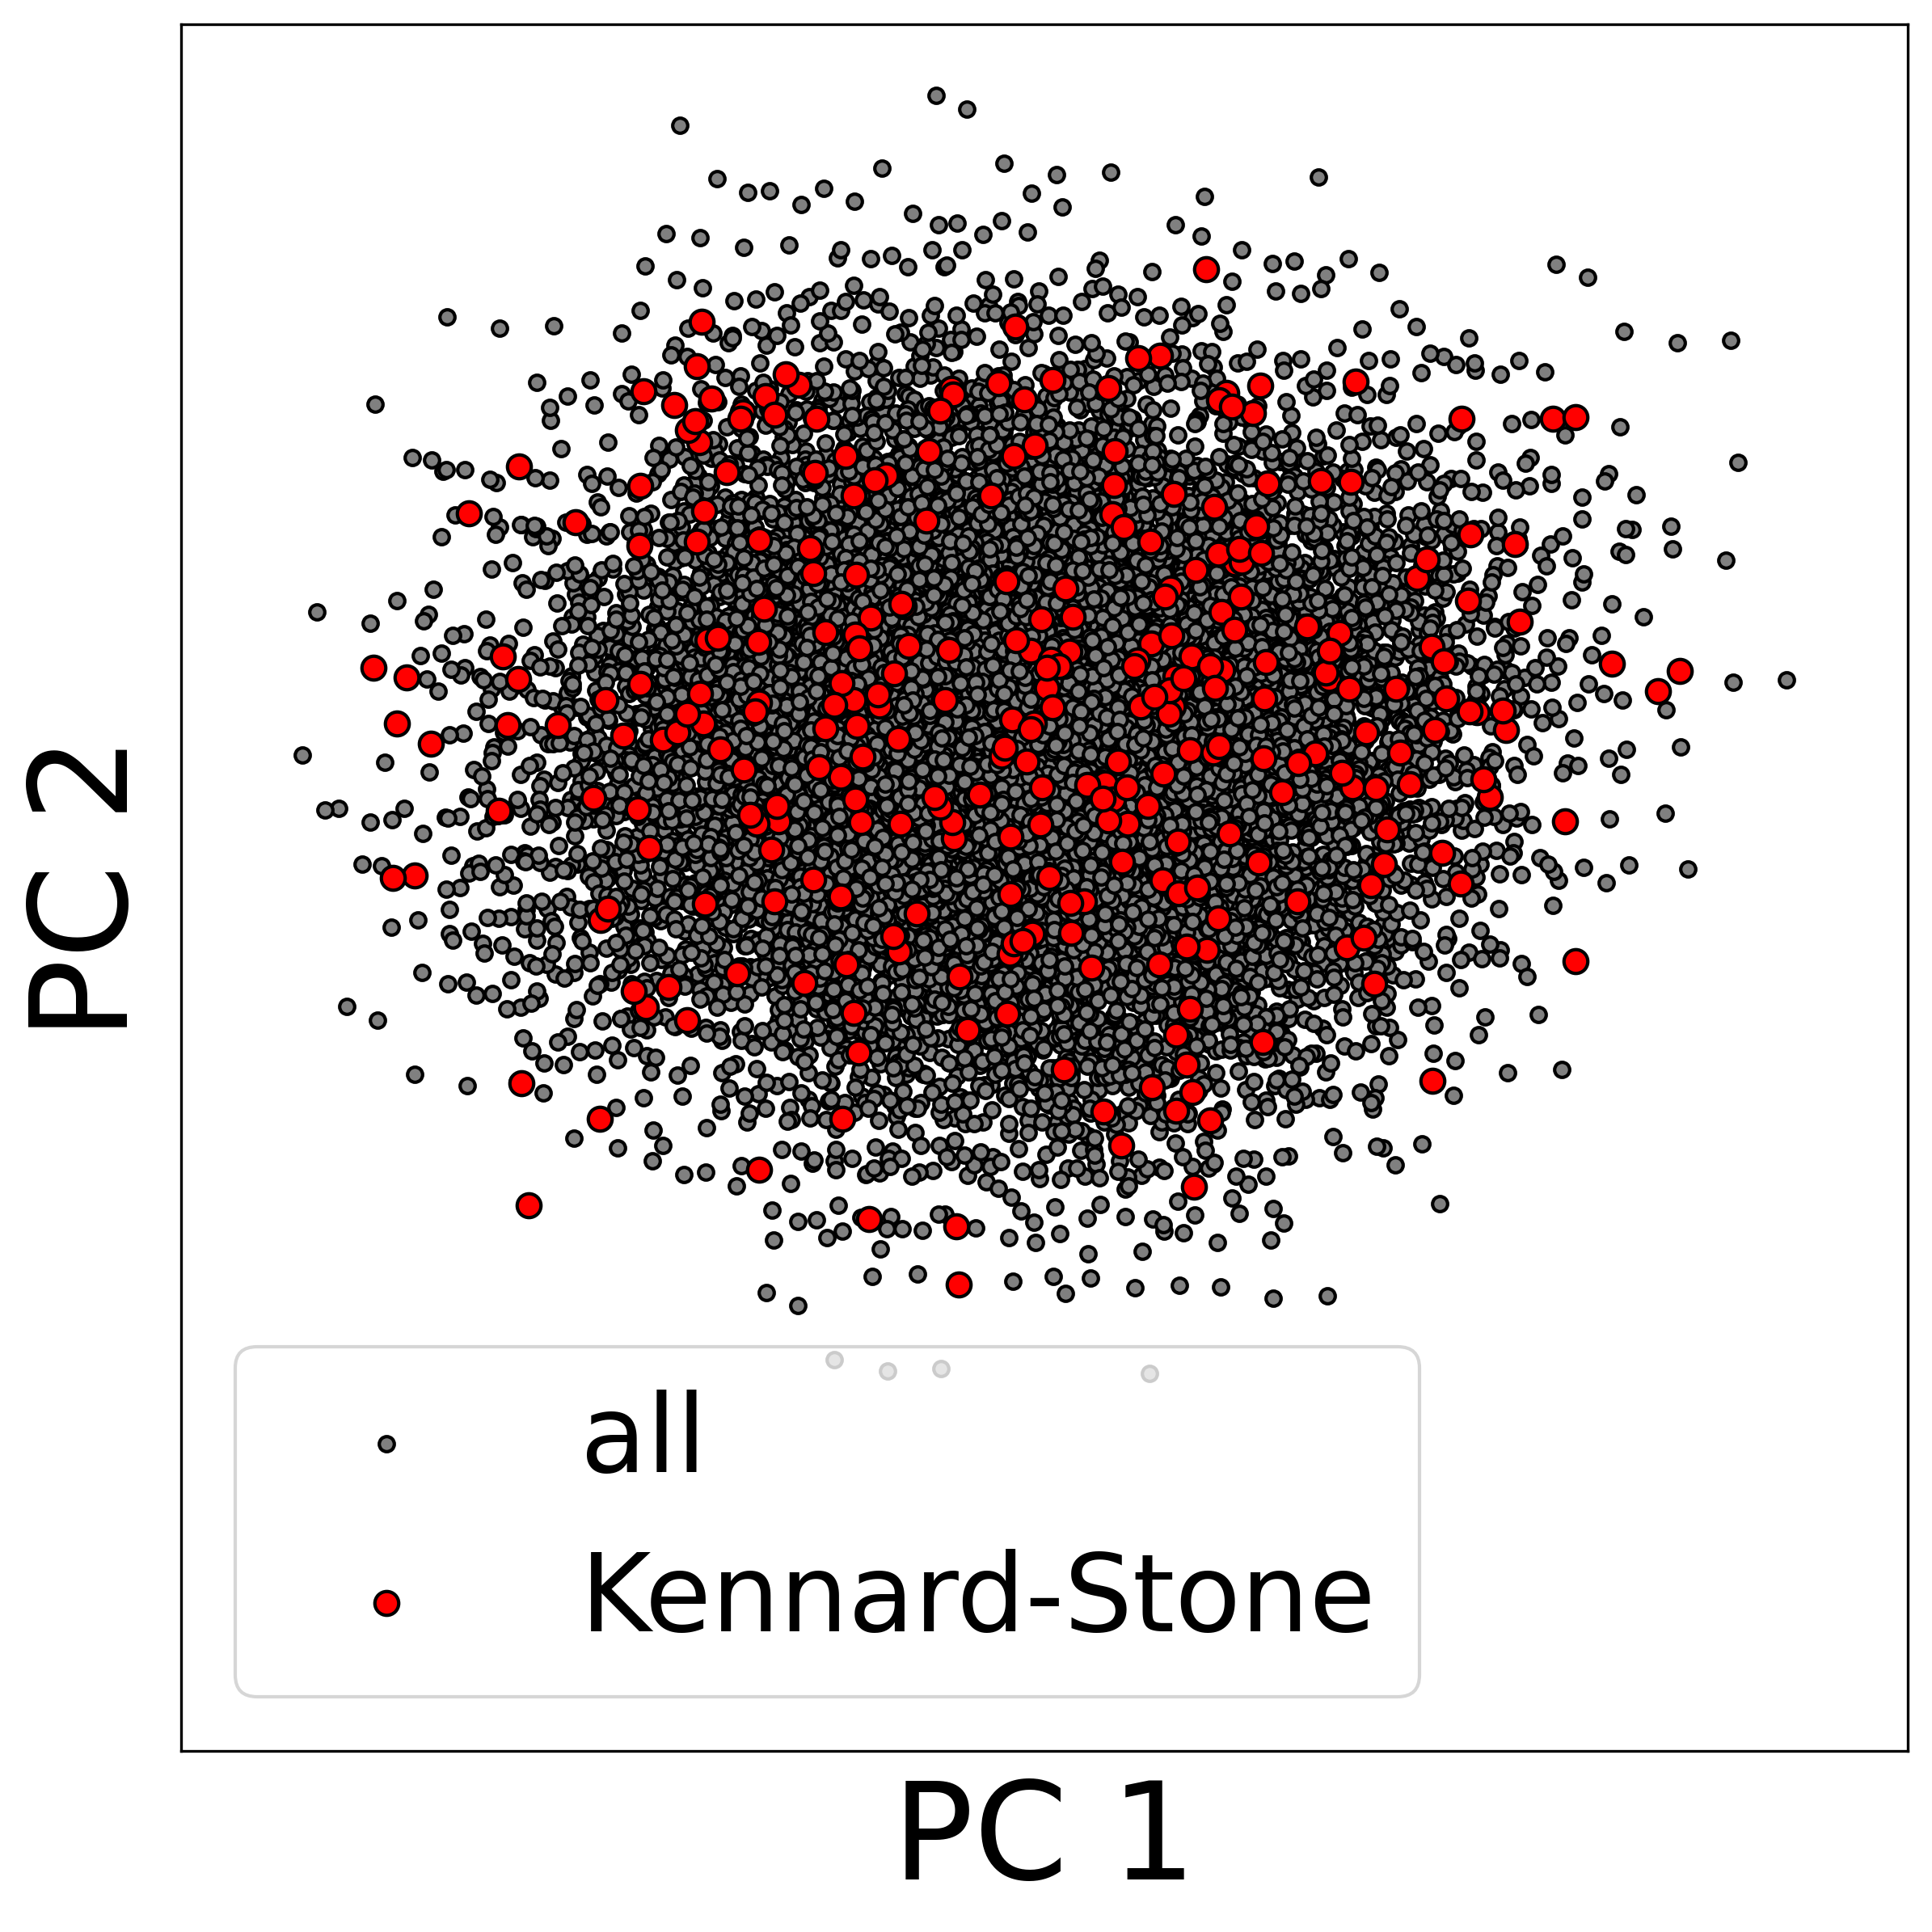

In [8]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
fs = 8
params = {'legend.fontsize': '%s' % (4. * fs),
          'figure.figsize': (fs * 1, fs),  # 8*6
          'axes.labelsize': '%s' % (5 * fs),
          'axes.titlesize': '%s' % (5 * fs),
          'xtick.labelsize': '%s' % (3.5 * fs),
          'ytick.labelsize': '%s' % (3.5 * fs),
          'font.family': 'serif',
          'font.serif': 'Calibri',
          'savefig.dpi': 300,
          'figure.dpi': 300,
          }
pylab.rcParams.update(params)
fig = plt.figure()
fig.tight_layout()
dxs = [0.08, 0.03]  # left to right
dx = (1 - sum(dxs)) / (len(dxs) - 1)
dys = [0.08, 0.03]  # down to top
dy = (1 - sum(dys)) / (len(dys) - 1)
nx = 1
ny = 1
ax = fig.add_axes([sum(dxs[:nx]) + (nx - 1) * dx, sum(dys[:ny]) + (ny - 1) * dy, dx, dy])
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
def plotxy(ax, X, Y, size=1.0, color=None, square=False, xlabel=None,
           ylabel=None, type='scatter', alpha=1.0, label=None, linestyle=None,
           fontsize=20):
    X = np.asarray(X)
    Y = np.asarray(Y)
    lx = X.min()
    ux = X.max()
    ly = Y.min()
    uy = Y.max()
    if square:
        lx = ly = min(lx, ly)
        ux = uy = max(ux, uy)
    dx = (ux - lx)
    dy = (uy - ly)
    if type == 'scatter':
        ax.scatter(X, Y, s=size, c=color, alpha=alpha, label=label, edgecolor='k')
    elif type == 'line':
        ax.plot(X, Y, c=color, linewidth=size, linestyle=linestyle, label=label,
                alpha=alpha)
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    ax.tick_params()
    ax.set_xlim(lx - dx * 0.01, ux + dx * 0.01)
    ax.set_ylim(ly - dy * 0.01, uy + dy * 0.01)
    return lx - dx * 0.01, ux + dx * 0.01, dx * 1.02, ly - dy * 0.01, uy + dy * 0.01, dy * 1.02

import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X)
X1 = pca.transform(X)
df2 = pd.read_csv('../data/case1/sample3.csv')
df2.atom_list = df2.atom_list.apply(lambda x: list(map(int, x.split(','))))
for an, name in atom_dict.items():
    df2[name] = df2.atom_list.apply(lambda x: x.count(an) / len(x))
X2 = pca.transform(df2[atom_dict.values()])

l, u, d, _, _, _ = plotxy(ax, X1[:, 0], X1[:, 1], square=False, size=20, color='gray', label='all')
_, _, _, _, _, _ = plotxy(ax, X2[:, 0], X2[:, 1], square=False, size=50, color='red', label='Kennard-Stone')
ax.set_xlim(-0.3, 0.32)
ax.set_ylim(-0.45, 0.32)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
plt.savefig('figure_PCA.png')